In [1]:
import os

from warnings import simplefilter

import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from dython.nominal import associations
from sklearn.preprocessing import Normalizer, StandardScaler

simplefilter('ignore')

In [2]:
df = pd.read_csv('data/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.shape

(1599, 12)

In [4]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


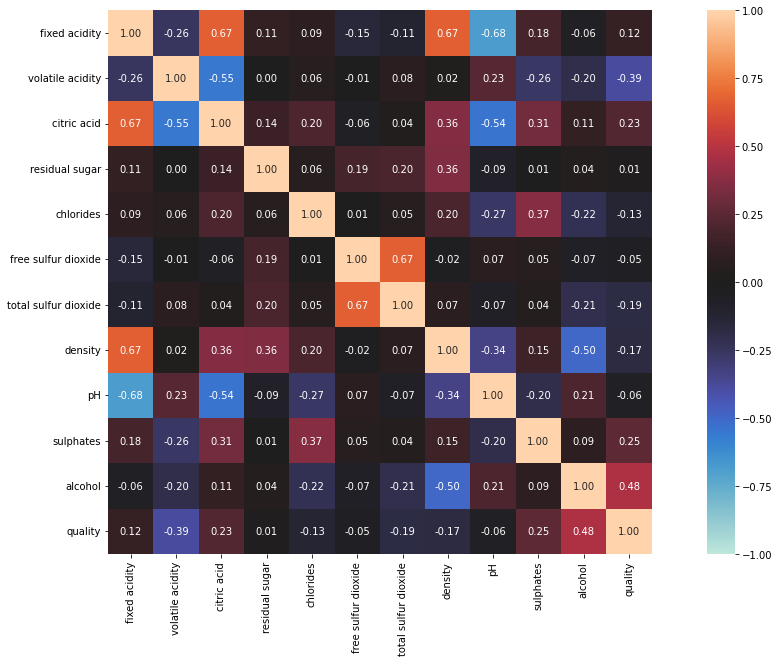

In [5]:
associations(df, figsize=(20, 10))
plt.show()

In [6]:
def normalize_scale(df):

    normalizer = Normalizer()
    scaler = StandardScaler()

    for col in df.columns.values:
        normalizer_array = normalizer.fit_transform(df[col].array.reshape(1,-1))
        df.loc[:, col] = scaler.fit_transform(normalizer_array.reshape(-1, 1))

    return df

In [7]:
def remove_outliers(df):
    for col in df.columns.values:
        if col != 'quality':
            df = df[(df[col] >= (df[col].mean() - (2 * df[col].std()))) & (df[col] <= (df[col].mean() + (2 * df[col].std())))]
    return df

In [8]:
df = normalize_scale(df)

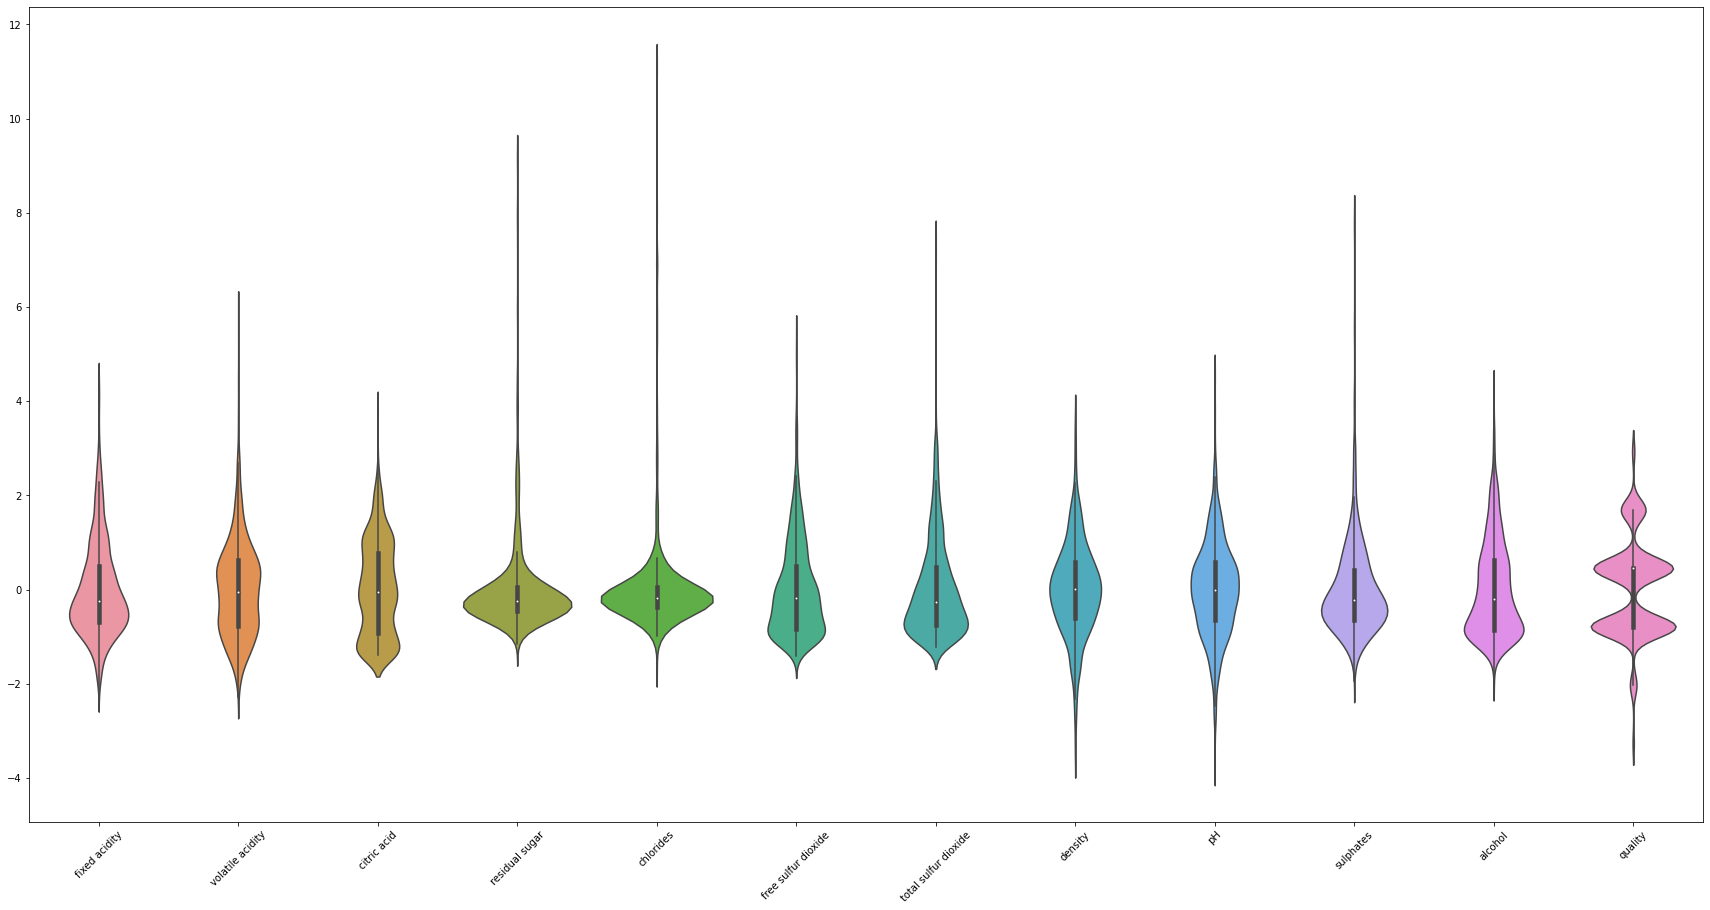

In [9]:
fig, ax = plt.subplots(figsize=(30, 15))
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
sns.violinplot(data=df, ax=ax)
plt.show()

In [10]:
df.shape

(1599, 12)

In [11]:
df = remove_outliers(df)

In [12]:
df.shape

(981, 12)

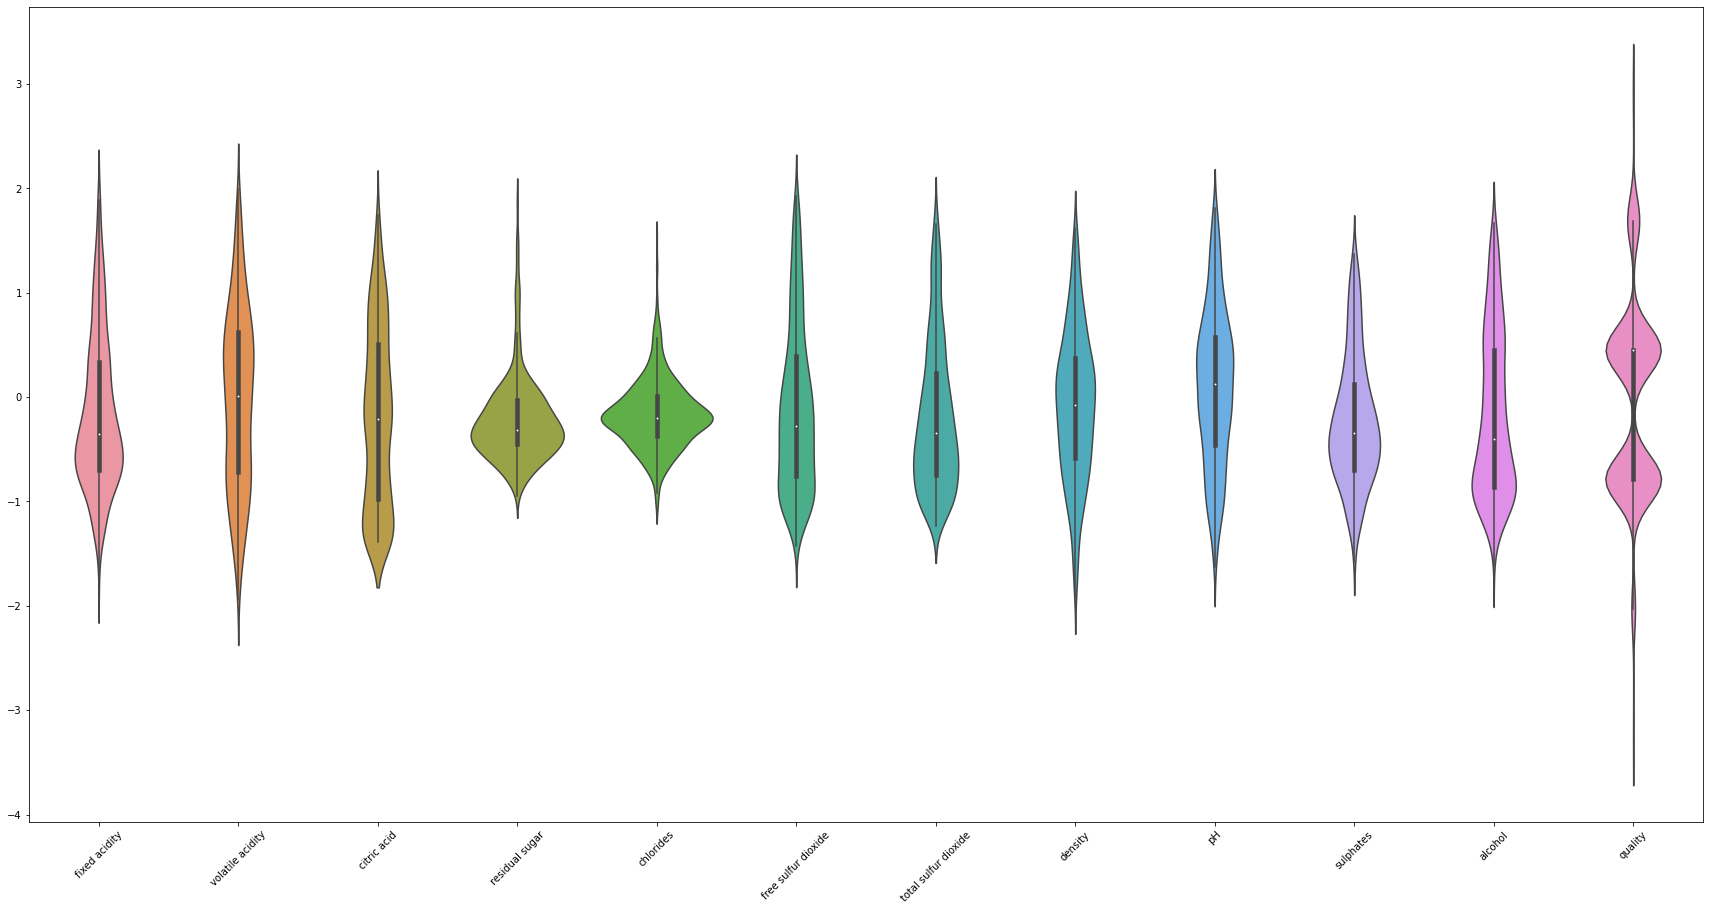

In [13]:
fig, ax = plt.subplots(figsize=(30, 15))
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
sns.violinplot(data=df, ax=ax)
plt.show()